Output()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
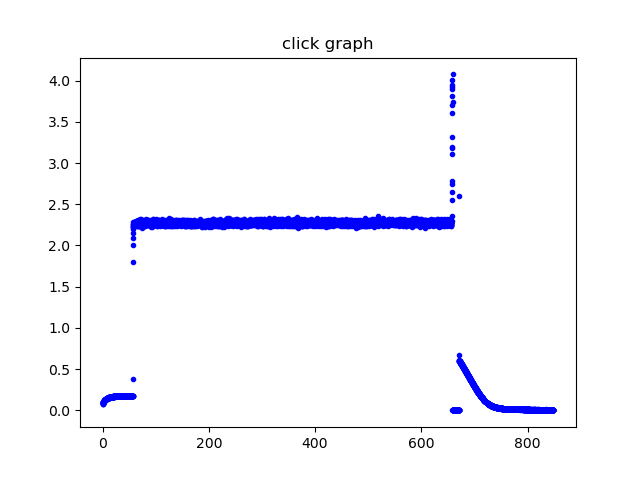

In [1]:
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ipywidgets import Output

file = "時系列/csv/600 560 0.csv"
data = pd.read_csv(file)
df_data = data.drop(["old_name", "new_name"], axis=1)

file_name = file.split("/")[-1].split(".")[0]
result_dir = "result/"

df_data = df_data.rename(
    columns={"time " + file_name: "time", "abs " + file_name: "abs"}
)

x = df_data["time"]
y = df_data["abs"]

# x = df["time " + file_name]
# y = df["abs " + file_name]

data_list = []
point_list = []
mask = np.ones(len(x), dtype=bool)
mask[0 : len(x)] = False
# グラフの描画
fig, ax = plt.subplots()
ax.plot(x, y, ".", color="blue", zorder=1)
ax.set_title("click graph")


state = 0
lpoint = 0
rpoint = 0

out = Output()
display(out)

@out.capture(clear_output=True)
def oncpaint(event):
    global state
    global lpoint, rpoint
    ind = np.searchsorted(x, event.xdata)
    # plt.title("You clicked index=" + str(ind))
    # 開始点
    if event.button == 3 and state == 0:
        plt.title("Start point is " + str(ind))
        ax.plot([x[ind]], [y[ind]], ".", color="red", zorder=2)
        fig.canvas.draw()
        value = [event.ydata, event.xdata]
        data_list.append(value)
        state = 1
        lpoint = ind
        print(data_list)
    # 終了点
    elif event.button == 3 and state == 1:
        plt.title("End point is " + str(ind))
        ax.plot([x[ind]], [y[ind]], ".", color="red", zorder=2)
        fig.canvas.draw()
        state = 2
        rpoint = ind + 1
        ax.plot(x[lpoint:rpoint], y[lpoint:rpoint], ".", color="red")
        print(lpoint)
    # キャンセル
    elif event.button == 3 and state == 2:
        plt.title("Canceled")
        state = 0
        ax.plot(x[lpoint:rpoint], y[lpoint:rpoint], ".", color="blue")
    # 決定
#     elif event.button == 1 and event.dblclick == 1 and state == 2:
    elif event.button == 1 and state == 2:
        plt.title("Approved")
        mask[lpoint:rpoint] = True
        state = 0
        # point_list.append([lpoint + int(":") + rpoint])
        point_list.append([lpoint, rpoint])
        # point_list.append([str(lpoint) + ":" + str(rpoint)])
        print(lpoint, rpoint)
    # 終了
    elif event.key == "q":
        fig.canvas.mpl_disconnect(cid)


cid = fig.canvas.mpl_connect("button_press_event", oncpaint)
plt.show()

In [6]:
# 選んだ部分をCSVファイルに書き出す
df_list = []
for n in range(len(point_list)):
    dfn = df_data[point_list[n][0] : point_list[n][1]]

    dfn.reset_index(inplace=True)
    dfn = dfn.drop(["index"], axis=1)
    df_list.append(dfn)


df_result = pd.concat(df_list, axis=1)

# df_resultの保存 まだノーマライズしてないデータを保存する
os.makedirs(result_dir, exist_ok=True)
# df_result.to_csv(result_dir + "extracted_decay " + file_name + ".csv", index=False)

df_result.to_csv(result_dir + file_name + ".csv", index=False)